<a href="https://colab.research.google.com/github/agrimwood/medphys_helper/blob/main/SABR_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# initialise and import raw match data
!rm -r /content/*.txt
!rm -r /content/*.csv
!mkdir /content/img
!git clone https://github.com/agrimwood/medphys_helper.git
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from scipy import stats
import os
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
from medphys_helper.margins import margin_calc
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()
%config InlineBackend.figure_format = "svg"
print ("\n\n##### LOAD ANONYMISED REFERENCE ID TABLE #####")
uploaded = files.upload()
print("##### File uploaded #####\n\n")
print ("##### LOAD ANONYMISED RAW OFFLINE REVIEW FILES EXPORTED FROM ARIA: #####")
uploaded = files.upload()
print("##### Files uploaded #####")
results = {}

mkdir: cannot create directory ‘/content/img’: File exists
fatal: destination path 'medphys_helper' already exists and is not an empty directory.


##### LOAD ANONYMISED REFERENCE ID TABLE #####


Saving AnonTable.csv to AnonTable.csv
##### File uploaded #####


##### LOAD ANONYMISED RAW OFFLINE REVIEW FILES EXPORTED FROM ARIA: #####


Saving 2001.txt to 2001.txt
Saving 2002.txt to 2002.txt
Saving 2003.txt to 2003.txt
Saving 2004.txt to 2004.txt
Saving 2005.txt to 2005.txt
Saving 2006.txt to 2006.txt
Saving 2007.txt to 2007.txt
Saving 2008.txt to 2008.txt
Saving 2009.txt to 2009.txt
Saving 2010.txt to 2010.txt
Saving 2011.txt to 2011.txt
Saving 2013.txt to 2013.txt
Saving 2014.txt to 2014.txt
Saving 2015.txt to 2015.txt
Saving 2016.txt to 2016.txt
Saving 2017.txt to 2017.txt
Saving 2018.txt to 2018.txt
Saving 2019.txt to 2019.txt
Saving 2020.txt to 2020.txt
Saving 3001.txt to 3001.txt
Saving 3002.txt to 3002.txt
Saving 3003.txt to 3003.txt
Saving 3004.txt to 3004.txt
Saving 3005.txt to 3005.txt
Saving 3006.txt to 3006.txt
Saving 3007.txt to 3007.txt
Saving 3008.txt to 3008.txt
Saving 3009.txt to 3009.txt
Saving 3010.txt to 3010.txt
Saving 3011.txt to 3011.txt
Saving 3012.txt to 3012.txt
Saving 3013.txt to 3013.txt
Saving 3014.txt to 3014.txt
Saving 3015.txt to 3015.txt
Saving 3016.txt to 3016.txt
##### Files uploaded

In [ ]:
# convert ID table to dataframe
ID_table = pd.read_csv("/content/AnonTable.csv", header=0)
ID_table.head()

,PatientID,ActivityName,Indication,PrescribedDose,Fractions,Sessions,Plan ID,MotionManagement,Comment
0,3001,VMAT SABR bone met,B,60.0,8,9,Left Lung Sup,Gated,Overlapping plans
1,3001,VMAT SABR bone met,B,60.0,8,9,Left Lung Inf,Gated,Overlapping plans
2,3002,VMAT SABR bone met,B,20.0,5,5,Spine T1,NoGating,No imaging post-treatment
3,3003,VMAT SABR bone met,B,30.0,5,5,Right Rib,Gated,NaN
4,3004,VMAT SABR bone met,B,30.0,5,5,Rt Ilium Inf,Gated,No imaging post-treatment; plans delivered sim...


In [ ]:
# preprocess and list only plans from 01/01/2022 onwards
nandrop = []
keep_dict = {'Image Type': 'CBCT'}
m = margin_calc(plansSpecified=True)
m.preprocess_data(keep_dict=keep_dict,end_to_end=None,nandrop=nandrop,fraction_threshold=2)

df = m.filtered_data.copy()
df = df[(pd.to_datetime(df['Session Date'],format='%d/%m/%Y')>=pd.to_datetime('01/01/2022',format='%d/%m/%Y')) & (df['Image Status'].isin(['App'])) ]
tx = df[['PatientID','Plan ID']].drop_duplicates().dropna()
df.columns

Index(['Image ID', 'Acquisition Beam ID', 'Image Type', 'Couch Vrt',
       'Couch Lng', 'Couch Lat', 'Couch Pitch', 'Couch Roll', 'Couch Rtn',
       'Source Rtn', 'Date', 'Time', 'Image Status', 'Plan ID', 'Course ID',
       'Session Date', 'Session Time', 'Online Match Vrt', 'Online Match Lng',
       'Online Match Lat', 'Online Match Pitch', 'Online Match Roll',
       'Online Match Rtn', 'Offline Match Vrt', 'Offline Match Lng',
       'Offline Match Lat', 'Offline Match Pitch', 'Offline Match Roll',
       'Offline Match Rtn', 'Treatment Field ID', 'Treatment Pos Vrt',
       'Treatment Pos Lng', 'Treatment Pos Lat', 'Treatment Pos Pitch',
       'Treatment Pos Roll', 'Treatment Pos Rtn', 'Treatment Pos Source Rtn',
       'Fraction', 'Date.1', 'Time.1', 'PatientID', 'ActivityName',
       'Indication', 'PrescribedDose', 'Fractions', 'Sessions',
       'MotionManagement', 'Comment'],
      dtype='object')

In [ ]:
# Filter on PatientID, Session Date/Time
aq = df[['PatientID',
         'Plan ID',
         'Fraction',
         'Image ID',
         'Treatment Field ID',
         'Session Date',
         'Session Time',
         'Time',
         'Time.1',
         'Offline Match Vrt',
         'Offline Match Lng',
         'Offline Match Lat',
         'Offline Match Pitch',
         'Offline Match Roll',
         'Offline Match Rtn',
         'Online Match Vrt',
         'Online Match Lng',
         'Online Match Lat',
         'Couch Vrt',
         'Couch Lng',
         'Couch Lat',
         'Couch Pitch',
         'Couch Roll',
         'Couch Rtn',
         'Treatment Pos Vrt',
         'Treatment Pos Lng',
         'Treatment Pos Lat',
         'Treatment Pos Pitch',
         'Treatment Pos Roll',
         'Treatment Pos Rtn']]
# convert session date to datetime format
aq['Session Date'] = pd.to_datetime(aq['Session Date'],format='%d/%m/%Y')
# remove sessions with fewer than three CBCTs
aq = aq.groupby(['PatientID','Plan ID','Session Date','Session Time']).filter(lambda x: len(x) > 2)
# sort
aq = aq.sort_values(by=['PatientID','Plan ID','Session Date','Time'],ignore_index=True)
# insert treatment time into the final CBCT acquisition
aq.iloc[aq.groupby(['PatientID','Plan ID','Session Date','Session Time']).nth(-1).index,6]=aq.iloc[aq.groupby(['PatientID','Plan ID','Session Date','Session Time']).nth(-2).index,6]
# insert fraction number into the final CBCT acquisition
aq.iloc[aq.groupby(['PatientID','Plan ID','Session Date','Session Time']).nth(-1).index,2]=aq.iloc[aq.groupby(['PatientID','Plan ID','Session Date','Session Time']).nth(-2).index,2]
# optionally filter sessions by patient ID and session date
#pt = 2015
#dt = '16/10/2023'
#aq[ (aq['PatientID']==pt) & (pd.to_datetime(aq['Session Date'],format='%d/%m/%Y')==pd.to_datetime(dt,format='%d/%m/%Y'))]
#aq[[        'Treatment Pos Lng',
#         'Treatment Pos Lat',
#         'Treatment Pos Pitch',
#         'Treatment Pos Roll',
#         'Treatment Pos Rtn']]

# ArcCount = number of arcs per fraction
aq['ArcCount'] = (
    aq.groupby(['PatientID',
                'Plan ID',
                'Session Date',
                'Session Time'])['Treatment Field ID'].transform('nunique'))
# Select then remove sessions with multiple arcs
arcTx =  aq [aq['ArcCount'] > 1]


# SubFracs = number of treatments per fraction
aq['SubFracs'] = (
    aq.groupby(['PatientID',
                'Plan ID',
                'Session Date',
                'Session Time'])['Time.1'].transform('nunique'))
# Select then remove sessions with interrupted deliveries
interruptTx = aq [aq['SubFracs'] > 1]


# FracRow = fraction number for all records in a treatment session
aq['FracRow'] = (
    aq.groupby(['PatientID',
                'Plan ID',
                'Session Date',
                'Session Time'])['Fraction'].transform('first'))
aq.FracRow = pd.to_numeric(aq.FracRow, errors='coerce').fillna(0).astype(np.int64)
# Select then remove sessions where treatment was not delivered
nonTx = aq [aq['FracRow'] == 0]

# remove filtered sessions
aq =  aq [aq['ArcCount'] == 1]
aq = aq [aq['SubFracs'] == 1]
aq = aq [aq['FracRow'] > 0]

# TrtTime = time relative to treatment (s)
aq['TrtTime'] = pd.to_datetime(aq['Time'],format= '%H:%M:%S').astype('int64')//1e9 - pd.to_datetime(aq.groupby(['PatientID','Plan ID','Session Date','Session Time'])['Time.1'].transform('first'),format= '%H:%M:%S').astype('int64')//1e9

# label CBCTs as Initial/PreTx/PostTx
aq['Acquisition'] = np.where(aq['TrtTime']<0, 'PreTx', 'PostTx')
aq.loc[aq.groupby(['PatientID',
                'Plan ID',
                'Session Date',
                'Session Time']).cumcount().eq(0), 'Acquisition'] = 'Initial'
# count PreTx per session
x = (aq.groupby(['PatientID','Plan ID','Session Date','Session Time'], as_index=False).agg(CountPreTx=("Acquisition", lambda x: str(x).count('PreTx'))))
aq=aq.join(x.set_index(['PatientID','Plan ID','Session Date','Session Time']), on=['PatientID','Plan ID','Session Date','Session Time'], how='inner')
# Count PostTx per session
x = (aq.groupby(['PatientID','Plan ID','Session Date','Session Time'], as_index=False).agg(CountPosTx=("Acquisition", lambda x: str(x).count('PostTx'))))
aq=aq.join(x.set_index(['PatientID','Plan ID','Session Date','Session Time']), on=['PatientID','Plan ID','Session Date','Session Time'], how='inner')


<ipython-input-4-7a4c0455bf06>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq['Session Date'] = pd.to_datetime(aq['Session Date'],format='%d/%m/%Y')


In [ ]:

#Write filtered data to csv file
aq.to_csv("sabr_data.csv",errors='ignore')


In [ ]:
# Number of Cases
bone_cases = len(aq[aq['PatientID']>=3000]['PatientID'].unique())
lung_cases = len(aq[aq['PatientID']<3000]['PatientID'].unique())
print("### Cases ###")
print("Bone: "+str(bone_cases)+", Lung: "+str(lung_cases))

# Number of Plans
bone_plans = len(aq[aq['PatientID']>=3000]['Plan ID'].unique())
lung_plans = len(aq[aq['PatientID']<3000]['Plan ID'].unique())
print("### Plans ###")
print("Bone: "+str(bone_plans)+", Lung: "+str(lung_plans))

# Number of Fractions
bone_fracs = len(aq[aq['PatientID']>=3000]['Session Date'].unique())
lung_fracs = len(aq[aq['PatientID']<3000]['Session Date'].unique())
print("### Fractions ###")
print("Bone: "+str(bone_fracs)+", Lung: "+str(lung_fracs))

# Number of CBCTs
bone_cbcts = len(aq[aq['PatientID']>=3000]['Time'].unique())
lung_cbcts = len(aq[aq['PatientID']<3000]['Time'].unique())
print("### Fractions ###")
print("Bone: "+str(bone_cbcts)+", Lung: "+str(lung_cbcts))

# Number of interrupted treatments - excluded from csv
bone_intrpt = len(interruptTx[interruptTx['PatientID']>=3000]['Session Date'].unique())
lung_intrpt = len(interruptTx[interruptTx['PatientID']<3000]['Session Date'].unique())
print("### Interrupts ###")
print("Bone: "+str(bone_intrpt)+", Lung: "+str(lung_intrpt))

# Number of treatments with inter-arc CBCTs - excluded from csv
bone_interarc = len(arcTx[arcTx['PatientID']>=3000]['Session Date'].unique())
lung_interarc = len(arcTx[arcTx['PatientID']<3000]['Session Date'].unique())
print("### Interrupts ###")
print("Bone: "+str(bone_interarc)+", Lung: "+str(lung_interarc))

### Cases ###
Bone: 15, Lung: 9
### Plans ###
Bone: 18, Lung: 8
### Fractions ###
Bone: 54, Lung: 52
### Fractions ###
Bone: 241, Lung: 176
### Interrupts ###
Bone: 1, Lung: 2
### Interrupts ###
Bone: 0, Lung: 1


In [ ]:
# create Patient ID tables
bones = aq[aq['PatientID']>=3000]['PatientID'].unique()
lungs = aq[aq['PatientID']<=3000]['PatientID'].unique()
x=aq[aq['PatientID']>=3000].groupby(['PatientID','Plan ID'],as_index=False).first()
x[['PatientID','Plan ID']]
y=aq[aq['PatientID']<3000].groupby(['PatientID','Plan ID'],as_index=False).first()
y[['PatientID','Plan ID']]

,PatientID,Plan ID
0,2009,Right Lung
1,2010,Left Lung
2,2011,SABR Lt Lung
3,2013,Gated R Lung
4,2015,Left Lung Inf
5,2015,Left Lung Sup
6,2016,SABR Lt Lung
7,2017,SABR Rt Lung
8,2018,Left Lung
9,2019,Lt Lung SABR


In [ ]:
# Intrafraction Errors => PostTx online matches
aq[['Online Match Vrt','Online Match Lng','Online Match Lat']] = aq[['Online Match Vrt','Online Match Lng','Online Match Lat']].astype(float)
intrafrac_bones = aq[(aq['Acquisition']=='PostTx') & (aq['Online Match Vrt'].notnull()) & (aq['PatientID']>=3000)][['PatientID','Plan ID','Session Date','Session Time','Online Match Vrt','Online Match Lng','Online Match Lat']]
intrafrac_lungs = aq[(aq['Acquisition']=='PostTx') & (aq['Online Match Vrt'].notnull()) & (aq['PatientID']<3000)][['PatientID','Plan ID','Session Date','Session Time','Online Match Vrt','Online Match Lng','Online Match Lat']]



In [ ]:
# Initial Setup Errors => Initial online matches
initial_bones = aq[(aq['Acquisition']=='Initial') & (aq['Online Match Vrt'].notnull()) & (aq['PatientID']>=3000)][['PatientID','Plan ID','Session Date','Session Time','Online Match Vrt','Online Match Lng','Online Match Lat']]
initial_lungs = aq[(aq['Acquisition']=='Initial') & (aq['Online Match Vrt'].notnull()) & (aq['PatientID']<3000)][['PatientID','Plan ID','Session Date','Session Time','Online Match Vrt','Online Match Lng','Online Match Lat']]

#initial_bones
#intrafrac_lungs

In [ ]:
# End-to-end Setup Errors => Initial CBCT to Treatment couch position
setup_bones = aq[(aq['Acquisition']=='Initial') & (aq['Treatment Pos Vrt'].notnull()) & (aq['PatientID']>=3000)][['PatientID','Plan ID','Session Date','Session Time','Couch Vrt','Couch Lng','Couch Lat','Treatment Pos Vrt','Treatment Pos Lng','Treatment Pos Lat']]
setup_bones[['Setup Vrt','Setup Lng','Setup Lat']] = setup_bones[['Treatment Pos Vrt','Treatment Pos Lng','Treatment Pos Lat']] - setup_bones[['Couch Vrt','Couch Lng','Couch Lat']].values
setup_lungs = aq[(aq['Acquisition']=='Initial') & (aq['Treatment Pos Vrt'].notnull()) & (aq['PatientID']<3000)][['PatientID','Plan ID','Session Date','Session Time','Couch Vrt','Couch Lng','Couch Lat','Treatment Pos Vrt','Treatment Pos Lng','Treatment Pos Lat']]
setup_lungs[['Setup Vrt','Setup Lng','Setup Lat']] = setup_lungs[['Treatment Pos Vrt','Treatment Pos Lng','Treatment Pos Lat']] - setup_lungs[['Couch Vrt','Couch Lng','Couch Lat']].values

#setup_bones
#setup_lungs

In [ ]:
# Population random error
def rand_err(df=pd.DataFrame(), cols=[], group=[]):
  all_cols = group + cols
  df = df[all_cols].groupby(group).std()
  P = len(df.index)
  rms = {}
  for c in cols:
    df['sq'] = df[c] * df[c]
    sum_sq = df['sq'].sum()
    rms[c] = (sum_sq / P) ** 0.5
  return rms

# Population systematic error
def syst_err(df=pd.DataFrame(), cols=[], group=[]):
  all_cols = group + cols
  df = df[all_cols].groupby(group).mean()
  P = len(df.index)
  dfM = df[cols].mean()
  sd = {}
  for c in cols:
    df['sq'] = (df[c]-dfM[c]) ** 2
    sum_sq = df['sq'].sum()
    sd[c] = (sum_sq / (P-1)) ** 0.5
  return sd

# add fudge factor from BIR Geometric Uncertainties Guidance Section 2.4.3.3
def add_fudge(fdict):
  for k in fdict.keys():
    fdict[k] = fdict[k] / (2**0.5)
  return fdict


In [ ]:
# Setup Error calcs
bone_setuperr_Sigma = syst_err(setup_bones,['Setup Vrt','Setup Lng','Setup Lat'],group=['PatientID'])
bone_setuperr_sigma = rand_err(setup_bones,['Setup Vrt','Setup Lng','Setup Lat'],group=['PatientID'])
lung_setuperr_Sigma = syst_err(setup_lungs,['Setup Vrt','Setup Lng','Setup Lat'],group=['PatientID'])
lung_setuperr_sigma = rand_err(setup_lungs,['Setup Vrt','Setup Lng','Setup Lat'],group=['PatientID'])

#bone_setuperr_Sigma
#bone_setuperr_sigma
#lung_setuperr_Sigma
lung_setuperr_sigma

{'Setup Vrt': 0.11575928317077483,
 'Setup Lng': 0.2619678623317393,
 'Setup Lat': 0.23336695026853388}

In [ ]:
# Intrafraction Error calcs
bone_intra_Sigma0 = syst_err(intrafrac_bones,['Online Match Vrt','Online Match Lng','Online Match Lat'],group=['PatientID'])
bone_intra_Sigma = add_fudge(bone_intra_Sigma0)
bone_intra_sigma0 = rand_err(intrafrac_bones,['Online Match Vrt','Online Match Lng','Online Match Lat'],group=['PatientID'])
bone_intra_sigma = add_fudge(bone_intra_sigma0)
lung_intra_Sigma0 = syst_err(intrafrac_lungs,['Online Match Vrt','Online Match Lng','Online Match Lat'],group=['PatientID'])
lung_intra_Sigma = add_fudge(lung_intra_Sigma0)
lung_intra_sigma0 = rand_err(intrafrac_lungs,['Online Match Vrt','Online Match Lng','Online Match Lat'],group=['PatientID'])
lung_intra_sigma = add_fudge(lung_intra_sigma0)

#bone_intra_Sigma
#bone_intra_sigma
#lung_intra_Sigma
lung_intra_sigma

{'Online Match Vrt': 0.02616492259883783,
 'Online Match Lng': 0.038335662455121544,
 'Online Match Lat': 0.037642058965665026}

In [ ]:
# avg number of CBCTs per patient
cnt = aq[aq['PatientID']>=3000].groupby(['PatientID','Plan ID','Session Date','Session Time'])['Acquisition'].count()
sd=cnt.std()
avg=cnt.mean()
#cnt[cnt>3]
print([avg,sd])

[3.142857142857143, 0.38778336716474066]


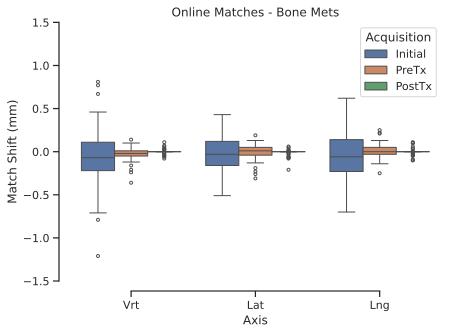

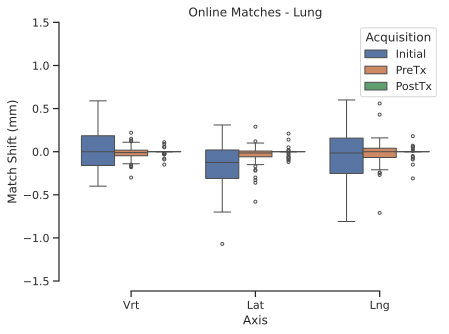

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# match shifts
matchesVrt = aq[['PatientID','Acquisition','Online Match Vrt']]
matchesVrt = matchesVrt.rename(columns={'Online Match Vrt': 'Match Shift (mm)'})
matchesVrt['Axis'] = 'Vrt'
matchesLat = aq[['PatientID','Acquisition','Online Match Lat']]
matchesLat = matchesLat.rename(columns={'Online Match Lat': 'Match Shift (mm)'})
matchesLat['Axis'] = 'Lat'
matchesLng = aq[['PatientID','Acquisition','Online Match Lng']]
matchesLng = matchesLng.rename(columns={'Online Match Lng': 'Match Shift (mm)'})
matchesLng['Axis'] = 'Lng'
matches = pd.concat([matchesVrt,matchesLat,matchesLng])
matches['Cohort']=""
matches.loc[ matches['PatientID']>=3000,'Cohort' ] = "Bone Mets"
matches.loc[ matches['PatientID']<3000,'Cohort' ] = "Lung"
matches_bone = matches[ matches['Cohort']=="Bone Mets"]
matches_lung = matches[ matches['Cohort']=="Lung"]

#bone match shifts
fig1, ax1 = plt.subplots()
ax1.set_ylim([-1.5, 1.5])
sns.set_theme(style="ticks", palette="deep")
sns.boxplot(x='Axis', y='Match Shift (mm)',
            hue='Acquisition',
            data=matches_bone,
            fliersize=3,ax=ax1).set_title("Online Matches - Bone Mets")
sns.despine(offset=10, trim=True)
sns.despine(offset=10, trim=True)
plt.savefig("bone_boxplot.png")
plt.show()

#lung match shifts
fig2, ax2 = plt.subplots()
ax2.set_ylim([-1.5, 1.5])
sns.set_theme(style="ticks", palette="deep")
ax2 = sns.boxplot(x='Axis', y='Match Shift (mm)',
            hue='Acquisition',
            data=matches_lung,
            fliersize=3,ax=ax2).set_title("Online Matches - Lung")
sns.despine(offset=10, trim=True)
plt.savefig("lung_boxplot.png")
plt.show()
